In [266]:
import pandas as pd
import geopandas as gpd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Reading Dataset

In [267]:

# data = r'C:\Users\Toby\Desktop\Extracted_data - Extracted_data.csv'
data = r'C:\Users\Toby\Desktop\random_pts_ts_dataset\Data_Extractor_1000_pts.csv'
train_pts= pd.read_csv(data)
train_pts

,system:index,EVI,Label,NDVI,datetime,.geo
0,20211116T041029_20211116T042310_T46QGE_0,0.216473,0,0.217051,2021-11-16 4:23:29,"{""type"":""Point"",""coordinates"":[95.636870427449..."
1,20211116T041029_20211116T042310_T46QGE_1,0.552326,0,0.421010,2021-11-16 4:23:29,"{""type"":""Point"",""coordinates"":[95.561046243260..."
2,20211116T041029_20211116T042310_T46QGE_2,0.176890,0,0.151411,2021-11-16 4:23:29,"{""type"":""Point"",""coordinates"":[95.749856660485..."
3,20211116T041029_20211116T042310_T46QGE_3,-0.221767,0,-0.019930,2021-11-16 4:23:29,"{""type"":""Point"",""coordinates"":[95.574344867021..."
4,20211116T041029_20211116T042310_T46QGE_4,0.187708,1,0.183592,2021-11-16 4:23:29,"{""type"":""Point"",""coordinates"":[95.528269178178..."
...,...,...,...,...,...,...
35872,20220306T040629_20220306T041623_T46QGE_995,0.163036,0,0.058458,2022-03-06 4:23:28,"{""type"":""Point"",""coordinates"":[95.616975004323..."
35873,20220306T040629_20220306T041623_T46QGE_996,0.284883,1,0.094215,2022-03-06 4:23:28,"{""type"":""Point"",""coordinates"":[95.644956809900..."
35874,20220306T040629_20220306T041623_T46QGE_997,0.329027,0,0.136063,2022-03-06 4:23:28,"{""type"":""Point"",""coordinates"":[95.754288548167..."
35875,20220306T040629_20220306T041623_T46QGE_998,0.547045,1,0.153846,2022-03-06 4:23:28,"{""type"":""Point"",""coordinates"":[95.687401614437..."


## Finding data distribution amongst dataset

In [268]:
#Finding classes counts in both label and geocord
print(train_pts['Label'].value_counts())
print(train_pts['.geo'].value_counts())

0    29371
1     6506
Name: Label, dtype: int64
{"type":"Point","coordinates":[95.63687042744925,17.687423611445134]}    36
{"type":"Point","coordinates":[95.61953451193273,17.671203364509235]}    36
{"type":"Point","coordinates":[95.50775707434362,17.79172475224197]}     36
{"type":"Point","coordinates":[95.51160979053492,17.756822281647086]}    36
{"type":"Point","coordinates":[95.6634763548986,17.74044004793054]}      36
                                                                         ..
{"type":"Point","coordinates":[95.77153010756354,17.62223235658088]}     32
{"type":"Point","coordinates":[95.49691803590503,17.792212655297377]}    29
{"type":"Point","coordinates":[95.49806374960812,17.812507666072346]}    24
{"type":"Point","coordinates":[95.4983432835163,17.8183145559137]}       23
{"type":"Point","coordinates":[95.4971850595383,17.813923961924687]}     23
Name: .geo, Length: 1000, dtype: int64


## Filterting data that has full timeseries scale

In [269]:
#filtering data that has full timeseries data
train_pts= train_pts.groupby(".geo").filter(lambda x: len(x) == 36)
print(train_pts['.geo'].value_counts())
print(train_pts['Label'].value_counts())

{"type":"Point","coordinates":[95.63687042744925,17.687423611445134]}    36
{"type":"Point","coordinates":[95.62240160019505,17.763711501258847]}    36
{"type":"Point","coordinates":[95.6634763548986,17.74044004793054]}      36
{"type":"Point","coordinates":[95.54202551814848,17.771455938246437]}    36
{"type":"Point","coordinates":[95.72991047480555,17.7409497011529]}      36
                                                                         ..
{"type":"Point","coordinates":[95.6829796105609,17.685648493294234]}     36
{"type":"Point","coordinates":[95.55704906597212,17.796648701365644]}    36
{"type":"Point","coordinates":[95.53838940378746,17.711278177165543]}    36
{"type":"Point","coordinates":[95.50134400813599,17.68881419178695]}     36
{"type":"Point","coordinates":[95.74228499717306,17.814994422444766]}    36
Name: .geo, Length: 936, dtype: int64
0    27540
1     6156
Name: Label, dtype: int64


## Creating bands name to create sort and fitler dataset

In [270]:
print(train_pts.shape,train_pts.T.shape)

bands = train_pts['.geo'].unique().tolist()
datetime = train_pts['datetime'].unique().tolist()

for i in range(5):
    print(i,':',bands[i])

len(bands),len(datetime)



(33696, 6) (6, 33696)
0 : {"type":"Point","coordinates":[95.63687042744925,17.687423611445134]}
1 : {"type":"Point","coordinates":[95.56104624326088,17.608685374981572]}
2 : {"type":"Point","coordinates":[95.74985666048516,17.646442527316502]}
3 : {"type":"Point","coordinates":[95.57434486702185,17.6229749678327]}
4 : {"type":"Point","coordinates":[95.52826917817863,17.803301214396853]}


(936, 36)

## Taking timeseries data from each geo coords and coverting it to numpy array
## Desired output should be ( x, length of timeseries )

In [271]:
evi_data=[]
for i in range(len(bands)):
    evi = train_pts[train_pts['.geo']==bands[i]]
    evi = evi['NDVI'].to_numpy()
    evi_data.append(evi)

label = []
for i in range(len(bands)):
    label_arr = train_pts[train_pts['.geo']==bands[i]]
    label_arr = label_arr['Label'].to_numpy()
    label.append(label_arr)

evi_data = np.array(evi_data,object)
print('Training data shape',evi_data.shape)
label = np.array(label,object)
print('Label shape',label.shape)
label_arr = np.squeeze(label.T[:1])
print('Squeeze label array',label_arr.shape)

Training data shape (936, 36)
Label shape (936, 36)
Squeeze label array (936,)


## plotting out data

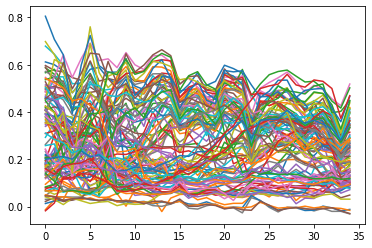

In [246]:
plt.plot(evi_data2.T);

In [247]:
datetime = datetime[:-1]
len(datetime),evi_data.shape

(35, (50, 35))

## Creating dataframe

In [272]:
df = pd.DataFrame(evi_data, columns = datetime)
df
df['label']=label_arr
df.head()

,2021-11-16 4:23:29,2021-11-18 4:13:36,2021-11-21 4:23:31,2021-11-23 4:13:32,2021-11-28 4:13:35,2021-12-01 4:23:31,2021-12-03 4:13:31,2021-12-06 4:23:26,2021-12-08 4:13:34,2021-12-11 4:23:30,...,2022-02-04 4:23:25,2022-02-09 4:23:30,2022-02-14 4:23:25,2022-02-21 4:13:30,2022-02-24 4:23:26,2022-02-26 4:13:38,2022-03-01 4:23:34,2022-03-03 4:13:32,2022-03-06 4:23:28,label
0,0.217051,0.153449,0.136297,0.158699,0.123288,0.126142,0.13862,0.108269,0.15566,0.182855,...,0.123249,0.089766,0.086037,0.094779,0.063052,0.076749,0.064536,0.075749,0.061338,0
1,0.42101,0.432816,0.41433,0.364829,0.396132,0.454817,0.33219,0.388302,0.390476,0.412219,...,0.138454,0.145749,0.128329,0.125053,0.108924,0.120672,0.109095,0.122893,0.106337,0
2,0.151411,0.146318,0.150056,0.161867,0.166157,0.176945,0.174513,0.201312,0.194019,0.191824,...,0.068046,0.09635,0.099037,0.127706,0.120998,0.128448,0.130916,0.14953,0.152359,0
3,-0.01993,-0.001126,-0.021536,0.004418,0.007088,0.028,0.005402,-0.01264,-0.018208,-0.013523,...,-0.025554,-0.013032,-0.039527,-0.01482,-0.027856,-0.023064,-0.019331,-0.026496,-0.013341,0
4,0.183592,0.32636,0.302871,0.207317,0.181289,0.311976,0.277332,0.224512,0.247849,0.281526,...,0.134726,0.127198,0.106105,0.085629,0.068303,0.071817,0.06526,0.084422,0.064189,1


## Shuffle dataframe and sort values

In [273]:
# # shuffle the DataFrame rows
df = df.sample(frac=1)
df = df.sort_values('label')
df

,2021-11-16 4:23:29,2021-11-18 4:13:36,2021-11-21 4:23:31,2021-11-23 4:13:32,2021-11-28 4:13:35,2021-12-01 4:23:31,2021-12-03 4:13:31,2021-12-06 4:23:26,2021-12-08 4:13:34,2021-12-11 4:23:30,...,2022-02-04 4:23:25,2022-02-09 4:23:30,2022-02-14 4:23:25,2022-02-21 4:13:30,2022-02-24 4:23:26,2022-02-26 4:13:38,2022-03-01 4:23:34,2022-03-03 4:13:32,2022-03-06 4:23:28,label
408,0.191745,0.16337,0.171864,0.172962,0.102464,0.144828,0.15258,0.188092,0.153805,0.177984,...,0.126659,0.134795,0.130281,0.171355,0.167397,0.167436,0.161193,0.195351,0.164962,0
524,0.10565,0.108428,0.115725,0.140459,0.209726,0.239706,0.243746,0.248603,0.31761,0.365466,...,0.098011,0.064272,0.05425,0.063108,0.043428,0.056591,0.058645,0.061224,0.051684,0
603,0.138199,0.13082,0.100089,0.086179,0.08559,0.079539,0.087729,0.078732,0.093776,0.10656,...,0.203639,0.207179,0.194045,0.183646,0.159068,0.168335,0.139403,0.100109,0.091959,0
588,0.127666,0.114763,0.125631,0.16553,0.163759,0.256527,0.285656,0.380558,0.383677,0.438379,...,0.19883,0.15781,0.114316,0.115697,0.075901,0.086599,0.070503,0.072614,0.063498,0
918,0.19022,0.183423,0.19722,0.191456,0.2147,0.223015,0.203349,0.209713,0.22596,0.240894,...,0.072233,0.062765,0.060392,0.073378,0.054012,0.067723,0.063049,0.074648,0.061887,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,0.406452,0.469006,0.477551,0.376523,0.45122,0.489194,0.429494,0.440299,0.464635,0.448403,...,0.112715,0.111938,0.094412,0.112218,0.092715,0.096689,0.092437,0.118819,0.095339,1
361,0.573506,0.630936,0.609034,0.545639,0.17482,0.578495,0.528981,0.551227,0.535671,0.532748,...,0.12497,0.140103,0.127415,0.155269,0.130914,0.139036,0.127347,0.148268,0.131025,1
828,0.227876,0.23455,0.229412,0.286427,0.342163,0.435004,0.38288,0.426316,0.428348,0.458843,...,0.164879,0.156066,0.119741,0.105753,0.083991,0.094509,0.078191,0.09025,0.072072,1
920,0.265954,0.355563,0.422847,0.403315,0.556936,0.598702,0.545988,0.489957,0.576796,0.591584,...,0.054131,0.058367,0.040768,0.060815,0.044151,0.062804,0.050139,0.061047,0.052571,1


In [274]:
df['label'].value_counts()

0    765
1    171
Name: label, dtype: int64

In [275]:
df.to_csv(r'C:\Users\Toby\Desktop\random_pts_ts_dataset\GEE_2_Model_pipeline_2.csv')

In [5]:
# # shuffle the DataFrame rows
# data = data.sample(frac=1)
# data
# data= data.sort_values('RASTERVALU')
data = data.sort_values('Label')

In [6]:
# data['RASTERVALU'].value_counts()
data['Label'].value_counts()

0    3793
1    1030
Name: Label, dtype: int64

In [12]:
training = data['EVI']

0       0.123421
3014    0.391241
3015    0.127331
3016    0.829263
3017    0.419952
Name: EVI, dtype: float64

In [112]:
data
# Number of rows to drop
n = 27052
 
# Dropping last n rows using drop
data.drop(data.head(n).index,
        inplace = True)
 

In [113]:
data['RASTERVALU'].value_counts()

0    8974
1    8974
Name: RASTERVALU, dtype: int64

In [114]:
data = data.sample(frac=1)

In [116]:
data['RASTERVALU'].value_counts()

1    8974
0    8974
Name: RASTERVALU, dtype: int64

In [117]:
data.to_csv(r'C:\Users\Toby\Desktop\tsai dataset\EVI training data norm.csv')